In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# dATA SET : https://drive.google.com/file/d/1fO3s7dOuuxp8yPLtE_s_K6qB5PKUA08V/view?usp=sharing

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('adult_dataset.csv')

In [4]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
df.shape

(32561, 15)

In [6]:
# rows with missing values represented as'?'.
df_1 = df[df.workclass == '?']
df_1

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
14      51         ?  172175     Doctorate             16       Never-married   
24      61         ?  135285       HS-grad              9  Married-civ-spouse   
44      71         ?  100820       HS-grad              9  Married-civ-spouse   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9           Separated   
32544   72         ?  129912       HS-grad              9  Married-civ-spouse   

      occupation   relationship                race     sex  capital.gain  \
0              ?  Not-in-family               White  Female             0   
2              ?      Unmarried               Black  Female             0   
14             ?  Not-in-family               White    Male             0   
24             ?        Husband               White    Male             0   
44             ?        Husband               White    Male             0   
...          ...            ...                 ...     ...           ...   
32533          ?           Wife               White  Female             0   
32534          ?  Not-in-family  Asian-Pac-Islander  Female             0   
32541          ?        Husband               White    Male             0   
32543          ?  Not-in-family               Black  Female             0   
32544          ?        Husband               White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
2              4356              40  United-States  <=50K  
14             2824              40  United-States   >50K  
24             2603              32  United-States  <=50K  
44             2489              15  United-States  <=50K  
...             ...             ...            ...    ...  
32533             0              55  United-States   >50K  
32534             0              99  United-States  <=50K  
32541             0              10  United-States   >50K  
32543             0              32  United-States  <=50K  
32544             0              25  United-States  <=50K  

[1836 rows x 15 columns]

In [7]:
df = df[df['workclass'] != '?']
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [8]:
df.shape

(30725, 15)

In [9]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [10]:
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [13]:
df.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

workclass     education marital.status         occupation   relationship  \
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   
5   Private       HS-grad       Divorced      Other-service      Unmarried   
6   Private          10th      Separated       Adm-clerical      Unmarried   

    race     sex native.country income  
1  White  Female  United-States  <=50K  
3  White  Female  United-States  <=50K  
4  White  Female  United-States  <=50K  
5  White  Female  United-States  <=50K  
6  White    Male  United-States  <=50K

In [15]:
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [16]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
1   82  132870              9             0          4356              18   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   
5   34  216864              9             0          3770              45   
6   38  150601              6             0          3770              40   

   workclass  education  marital.status  occupation  relationship  race  sex  \
1          2         11               6           3             1     4    0   
3          2          5               0           6             4     4    0   
4          2         15               5           9             3     4    0   
5          2         11               0           7             4     4    0   
6          2          0               5           0             4     4    1   

   native.country  income  
1              38       0  
3              38       0  
4              38       0  
5              38       0  
6              38       0

In [17]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

In [18]:
df.income.value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [19]:
7650/(7650+23075)

0.24898291293734745

In [20]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [21]:
# Putting feature variable to X
X = df.drop(['income'],axis=1)

# Putting response variable to y
y = df['income']

In [22]:
X.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week     workclass     education  marital.status  \
count    30162.000000  30162.000000  30162.000000    30162.000000   
mean        40.931238      2.199324     10.333764        2.580134   
std         11.979984      0.953925      3.812292        1.498016   
min          1.000000      0.000000      0.000000        0.000000   
25%         40.000000      2.000000      9.000000        2.000000   
50%         40.000000      2.000000     11.000000        2.000000   
75%         45.000000      2.000000     12.000000        4.000000   
max         99.000000      6.000000     15.000000        6.000000   

         occupation  relationship          race           sex  native.country  
count  30162.000000  30162.000000  30162.000000  30162.000000    30162.000000  
mean       5.959850      1.418341      3.678602      0.675685       36.382567  
std        4.029566      1.601338      0.834709      0.468126        6.105372  
min        0.000000      0.000000      0.000000      0.000000        0.000000  
25%        2.000000      0.000000      4.000000      0.000000       38.000000  
50%        6.000000      1.000000      4.000000      1.000000       38.000000  
75%        9.000000      3.000000      4.000000      1.000000       38.000000  
max       13.000000      5.000000      4.000000      1.000000       40.000000

In [23]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
24351   42  289636              9             0             0              46   
15626   37   52465              9             0             0              40   
4347    38  125933             14             0             0              40   
23972   44  183829             13             0             0              38   
26843   35  198841             11             0             0              35   

       workclass  education  marital.status  occupation  relationship  race  \
24351          2         11               2          13             0     4   
15626          1         11               4           7             1     4   
4347           0         12               2           9             0     4   
23972          5          9               4           0             1     4   
26843          2          8               0          12             3     4   

       sex  native.country  
24351    1              38  
15626    1              38  
4347     1              19  
23972    0              38  
26843    1              38

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()

In [26]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
y_pred_default = dt.predict(X_test)

In [29]:
y_pred_traini = dt.predict(X_train)

In [30]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6867
           1       0.59      0.62      0.60      2182

    accuracy                           0.81      9049
   macro avg       0.73      0.74      0.74      9049
weighted avg       0.81      0.81      0.81      9049



In [31]:
print(classification_report(y_train, y_pred_traini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15787
           1       1.00      1.00      1.00      5326

    accuracy                           1.00     21113
   macro avg       1.00      1.00      1.00     21113
weighted avg       1.00      1.00      1.00     21113



In [84]:
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [85]:
# Putting features
features = list(df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [34]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.250518 to fit



In [86]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

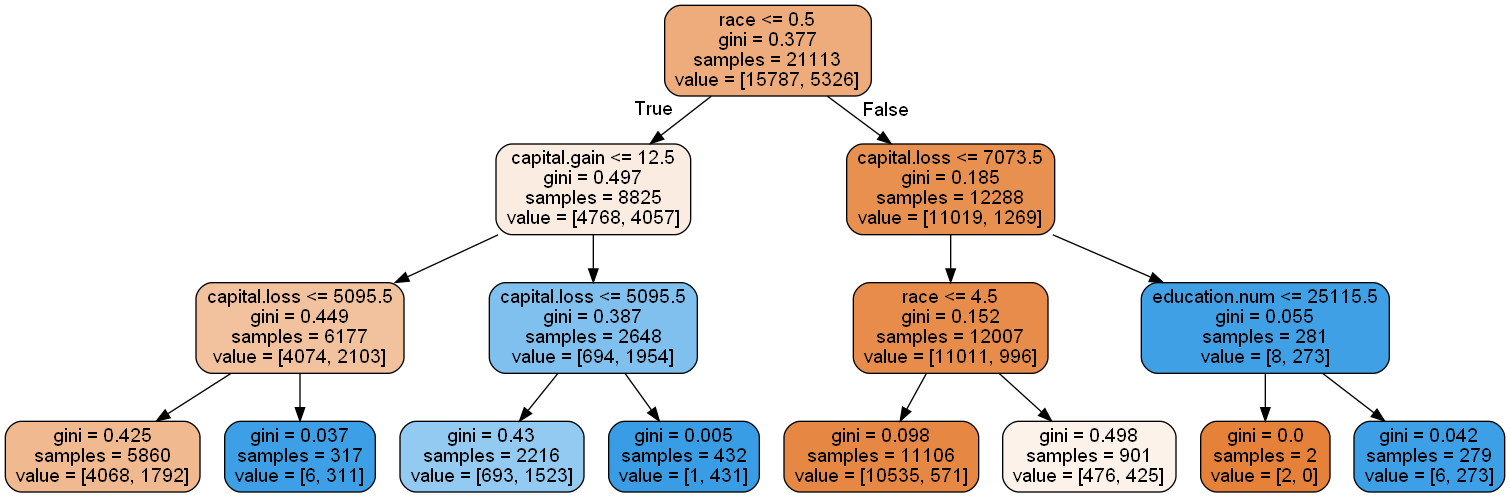

In [87]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
y_pred_default = dt.predict(X_test)

In [38]:
y_pred_traini = dt.predict(X_train)

In [39]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [40]:
print(classification_report(y_train, y_pred_traini))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15787
           1       0.80      0.53      0.64      5326

    accuracy                           0.85     21113
   macro avg       0.83      0.74      0.77     21113
weighted avg       0.84      0.85      0.84     21113



In [88]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [142]:
folds = KFold(n_splits=5, shuffle=True, random_state=123)

In [143]:
parameters = {'max_depth': range(1, 25)}

In [144]:
dt = DecisionTreeClassifier(random_state=1)

In [145]:
tree = GridSearchCV(estimator=dt, param_grid =parameters, cv = folds,  scoring = 'accuracy' , return_train_score=True )

In [146]:
tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(1, 25)}, return_train_score=True,
             scoring='accuracy')

In [147]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.010391      0.002266         0.002338        0.000418   
1       0.012332      0.000410         0.001805        0.000506   
2       0.016440      0.001071         0.002413        0.000508   
3       0.020574      0.001116         0.001841        0.000282   
4       0.023900      0.000408         0.002200        0.000398   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.748757           0.751125   
1               2  {'max_depth': 2}           0.821454           0.824059   
2               3  {'max_depth': 3}           0.835425           0.838267   
3               4  {'max_depth': 4}           0.837556           0.843476   
4               5  {'max_depth': 5}           0.841345           0.846081   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.740469           0.742302  ...         0.747738        0.005724   
1           0.820033           0.807200  ...         0.819968        0.006823   
2           0.833767           0.822359  ...         0.834415        0.006680   
3           0.840635           0.828991  ...         0.839814        0.006485   
4           0.848923           0.833965  ...         0.844598        0.006478   

   rank_test_score  split0_train_score  split1_train_score  \
0               24            0.747484            0.746892   
1               16            0.819597            0.818946   
2               11            0.834281            0.833511   
3                9            0.840201            0.838840   
4                6            0.843280            0.844168   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.749556            0.749097            0.745663   
1            0.819953            0.823160            0.818187   
2            0.834695            0.837547            0.832514   
3            0.839787            0.842401            0.843467   
4            0.846892            0.847019            0.847966   

   mean_train_score  std_train_score  
0          0.747738         0.001431  
1          0.819969         0.001705  
2          0.834510         0.001690  
3          0.840939         0.001721  
4          0.845865         0.001809  

[5 rows x 21 columns]

In [119]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=7)

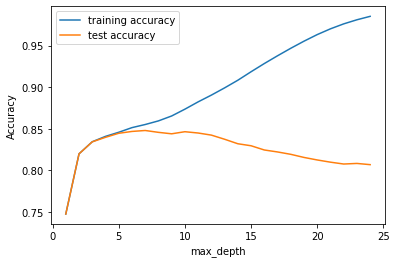

In [120]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [121]:
# specify number of folds for k-fold CV


# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [122]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.058725      0.005209         0.002882        0.000703   
1       0.046774      0.002055         0.002294        0.000397   
2       0.045653      0.003692         0.002449        0.000452   
3       0.039920      0.001112         0.002605        0.000585   
4       0.039462      0.001353         0.001932        0.000161   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.816244   
1                     25  {'min_samples_leaf': 25}           0.833057   
2                     45  {'min_samples_leaf': 45}           0.848686   
3                     65  {'min_samples_leaf': 65}           0.849159   
4                     85  {'min_samples_leaf': 85}           0.847265   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.821217           0.821928           0.822833  ...   
1           0.845134           0.839687           0.842965  ...   
2           0.846318           0.847739           0.837518  ...   
3           0.844423           0.855079           0.838939  ...   
4           0.845607           0.853422           0.839649  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.820916        0.002396               10            0.915098   
1         0.841615        0.004953                9            0.867792   
2         0.847440        0.006190                3            0.861101   
3         0.848719        0.006444                1            0.856898   
4         0.848245        0.005623                2            0.854885   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.914802            0.912729            0.913267   
1            0.871818            0.867732            0.872476   
2            0.863055            0.859503            0.864010   
3            0.858496            0.856128            0.860281   
4            0.855240            0.853464            0.855900   

   split4_train_score  mean_train_score  std_train_score  
0            0.911847          0.913549         0.001234  
1            0.868687          0.869701         0.002036  
2            0.861169          0.861768         0.001589  
3            0.855071          0.857375         0.001833  
4            0.853591          0.854616         0.000947  

[5 rows x 21 columns]

In [123]:
tree.best_estimator_

DecisionTreeClassifier(min_samples_leaf=65)

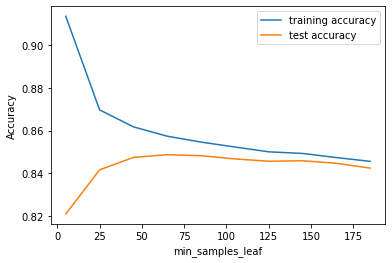

In [124]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [157]:
param_grid = {
    'max_depth': range(5, 15, 2),
    'min_samples_leaf': range(20, 100, 10 ),
    'criterion': ["entropy", "gini"]
}

In [158]:
# fit tree on training data
tree = GridSearchCV(dt, param_grid, 
                    cv=folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 2),
                         'min_samples_leaf': range(20, 100, 10)},
             return_train_score=True, scoring='accuracy')

In [159]:
tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=20,
                       random_state=1)

In [160]:
tree.best_score_

0.8505187300197774

In [161]:
### Regression 

new = pd.read_csv("cars24-car-price-clean.csv")

In [162]:
new.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

In [163]:
y_new = new["selling_price"]
X_new = new.drop(["selling_price"], axis = 1)

In [164]:
regtree = DecisionTreeRegressor(max_depth = 3)

In [165]:
regtree.fit(X_new, y_new)

DecisionTreeRegressor(max_depth=3)

In [166]:
feat = X_new.columns

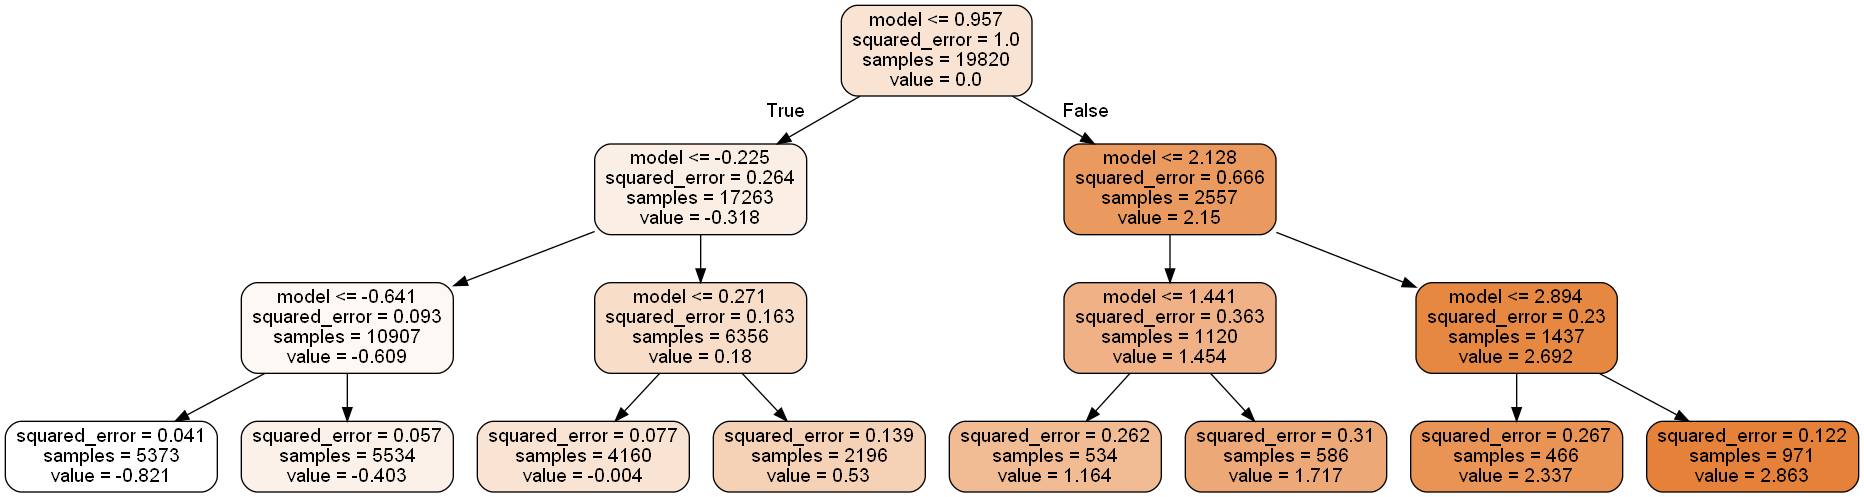

In [167]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(regtree, out_file=dot_data,
                feature_names=feat, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())